<a href="https://colab.research.google.com/github/tvaditya/intro_ds_and_ml/blob/main/%5BEML1%5D_InterpretExplain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weight Prediction

In [1]:
import math
import requests
from bs4 import BeautifulSoup
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
url = 'http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights'
page = requests.get(url)


In [3]:
soup = BeautifulSoup(page.content, 'html.parser')
tbl = soup.find("table",{"class":"wikitable"})

In [4]:
height_weight_df = pd.read_html(str(tbl))[0][['Height(Inches)','Weight(Pounds)']]

In [15]:
height_weight_df.head()

,Height(Inches),Weight(Pounds)
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30


In [5]:
num_records = height_weight_df.shape[0]
print(num_records)

200


In [6]:
x = height_weight_df['Height(Inches)'].values.reshape(num_records, 1)
y = height_weight_df['Weight(Pounds)'].values.reshape(num_records, 1)


In [18]:
x[:6], y[:6]

(array([[65.78],
        [71.52],
        [69.4 ],
        [68.22],
        [67.79],
        [68.7 ]]), array([[112.99],
        [136.49],
        [153.03],
        [142.34],
        [144.3 ],
        [123.3 ]]))

In [7]:
model = linear_model.LinearRegression()
_ = model.fit(x,y)


In [9]:
print("ŷ = " + str(model.intercept_[0]) + " + " + str(model.coef_.T[0][0]) + " x₁")

ŷ = -106.02770644878137 + 3.4326761292716297 x₁


In [10]:
y_pred = model.predict(x)
mae = mean_absolute_error(y, y_pred)
print(mae)

7.7587373803882205


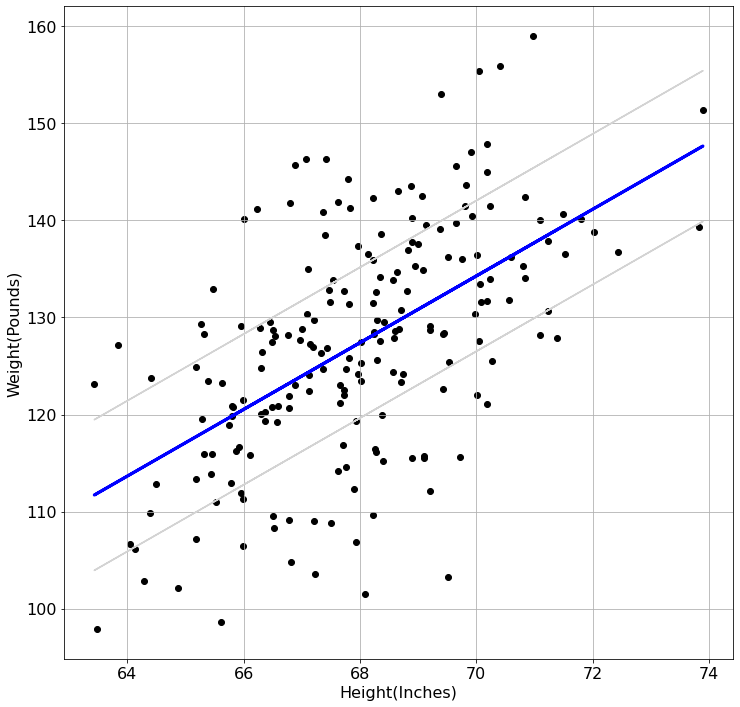

In [11]:
plt.figure(figsize=(12,12))
plt.rcParams.update({'font.size': 16})
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.plot(x, y_pred + mae, color='lightgray')
plt.plot(x, y_pred - mae, color='lightgray')
plt.title('')
plt.xlabel('Height(Inches)')
plt.ylabel('Weight(Pounds)')
plt.grid(True)
plt.show()

In [12]:
corr, pval = pearsonr(x[:,0], y[:,0])
print(corr)

0.5568647346122995


In [13]:
print(pval < 0.05)

True
